# PCA on Iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
df=pd.read_csv('../data/processed/iris_clean.csv')
raw = pd.read_csv('../data/raw/iris.csv')
df.head()
feature_cols=['sepal.length','sepal.width','petal.length','petal.width']
X=df[feature_cols]
y=raw['variety']
X.head()
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

## Covariance matrix

In [4]:
cov_matrix=X.T@X/(X.shape[0]-1)
print(cov_matrix)
cov_matrixNumpy=np.cov(X,rowvar=False)
print(cov_matrixNumpy)

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


## Computing eigenvalues and eigenvectors

In [5]:
# I=np.eye(cov_matrix.shape[0])
# print(I)
# TransformMatrix=cov_matrix-I
# print(TransformMatrix)
##########################
eigvals,eigvecs=np.linalg.eig(cov_matrix)

print(f'eigen values are:{eigvals},\neigenvectors are :\n{eigvecs}')

pairs=[(eigvals[i],eigvecs[:,i])for i in range(len(eigvals))]
for idx, (λ, v) in enumerate(pairs, start=1):
    print(f"Mode {idx}: λ = {λ:.4f},  v = {v}")
print('\n')
pairs_sort=sorted(pairs,key=lambda pair:pair[0],reverse=True)
for idx, (λ, v) in enumerate(pairs_sort, start=1):
    print(f"Mode {idx}: λ = {λ:.4f},  v = {v}")

eigen values are:[2.91849782 0.91403047 0.14675688 0.02071484],
eigenvectors are :
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Mode 1: λ = 2.9185,  v = [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Mode 2: λ = 0.9140,  v = [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
Mode 3: λ = 0.1468,  v = [-0.71956635  0.24438178  0.14212637  0.63427274]
Mode 4: λ = 0.0207,  v = [ 0.26128628 -0.12350962 -0.80144925  0.52359713]


Mode 1: λ = 2.9185,  v = [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Mode 2: λ = 0.9140,  v = [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
Mode 3: λ = 0.1468,  v = [-0.71956635  0.24438178  0.14212637  0.63427274]
Mode 4: λ = 0.0207,  v = [ 0.26128628 -0.12350962 -0.80144925  0.52359713]


## computing explained-Variance Ratio

In [6]:
total_var=np.sum(eigvals)

evr=eigvals/total_var
print(evr)

cum_evr=np.cumsum(evr)
print(cum_evr)

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.95813207 0.99482129 1.        ]


##Creating a tabular view

In [9]:
component=[f'PC{i+1}'for i in range(4)]
Info=pd.DataFrame({
    'components':component,
    'eigenvalue':eigvals,
    'explained ratio':evr,
    'cumulative Variance':cum_evr
})
print(Info.round(3))

  components  eigenvalue  explained ratio  cumulative Variance
0        PC1       2.918            0.730                0.730
1        PC2       0.914            0.229                0.958
2        PC3       0.147            0.037                0.995
3        PC4       0.021            0.005                1.000


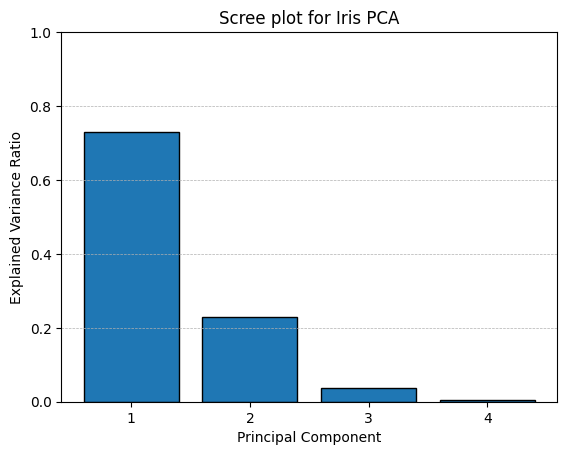

In [18]:
pc_indices=[1,2,3,4]
plt.figure()
plt.bar(pc_indices,evr,edgecolor='k')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for Iris PCA')
plt.xticks(pc_indices)
plt.ylim(0,1.0)

plt.grid(axis='y',linestyle='--',linewidth=0.5)
plt.savefig('../imgs/scree.png', bbox_inches='tight')
plt.show()


##Ploting PCA

In [ ]:
P=eigvecs[:,:2]
print(P.shape)
X_pca=X@P
X_pca.columns = ['PC1','PC2']  


df_pca=pd.DataFrame(X_pca,columns=['PC1','PC2'])
df_pca['Species']=y.values
print(df_pca)


(4, 2)
          PC1       PC2    Species
0   -2.257141 -0.478424     Setosa
1   -2.074013  0.671883     Setosa
2   -2.356335  0.340766     Setosa
3   -2.291707  0.595400     Setosa
4   -2.381863 -0.644676     Setosa
..        ...       ...        ...
145  1.864258 -0.385674  Virginica
146  1.559356  0.893693  Virginica
147  1.516091 -0.268171  Virginica
148  1.368204 -1.007878  Virginica
149  0.957448  0.024250  Virginica

[150 rows x 3 columns]


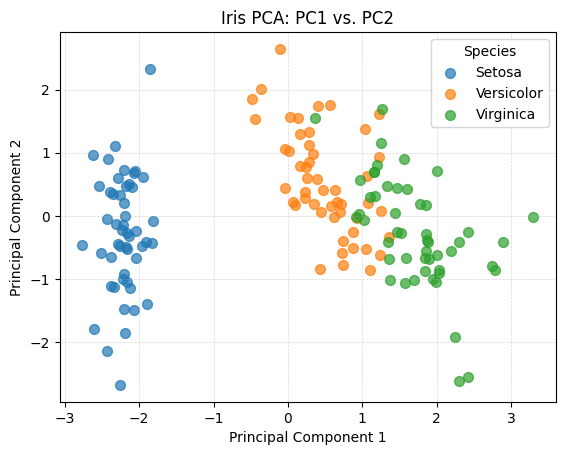

In [40]:
plt.figure()
for sp in df_pca['Species'].unique():
    subset=df_pca[df_pca['Species']==sp]
    plt.scatter(
        subset['PC1'],subset['PC2'],
        s=50,
        alpha=0.7,
        label=sp
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris PCA: PC1 vs. PC2')
plt.legend(title='Species')
plt.grid(axis='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.savefig('../imgs/iris_pca_scatter.png', bbox_inches='tight')
plt.show()

So as we can see there is tight cluster of Iris Setosa seprated from two others

Since PC1 AND PC2  captrued ~ 95% of the variance, this 2D plot retains the most information from our 4D dataset